In [1]:
from deepchecks.suites import full_suite
import pandas as pd

In [2]:
source = 'https://raw.githubusercontent.com/prodramp/publiccode/master/datasets/titanic.csv'
#source = 'https://raw.githubusercontent.com/prodramp/publiccode/master/datasets/heart.csv'

In [3]:
df = pd.read_csv(source)

In [4]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
from sklearn.model_selection import train_test_split

In [75]:
df_train, df_test = train_test_split(df, test_size=.30)

In [10]:
from deepchecks import Dataset

In [13]:
label_col  = "Survived"

In [76]:
ds_train = Dataset(df_train, label = label_col)

Automatically inferred these columns as categorical features: Pclass, Sex, Embarked. 



In [77]:
ds_test = Dataset(df_test, label = label_col, cat_features= ['Pclass', 'Sex', 'Embarked']) #,'Parch', 'SibSp'])

In [5]:
from deepchecks import TrainTestBaseCheck, CheckResult, Dataset, CheckRunContext


class DatasetSizeComparison(TrainTestBaseCheck):
    """Check which compares the sizes of train and test datasets."""

    def run_logic(self, context: CheckRunContext) -> CheckResult:
        ## Check logic
        train_size = context.train.n_samples
        test_size = context.test.n_samples

        ## Return value as check result
        return_value = {'train_size': train_size, 'test_size': test_size}
        return CheckResult(return_value)

In [20]:
result = DatasetSizeComparison().run(ds_train, ds_test)

In [21]:
result

Dataset Size Comparison Check which compares the sizes of train and test datasets. Read More... Additional Outputs ✓ Nothing found

In [22]:
result.value

{'train_size': 712, 'test_size': 179}

In [23]:
import matplotlib.pyplot as plt

class DatasetSizeComparison(TrainTestBaseCheck):
    """Check which compares the sizes of train and test datasets."""

    def run_logic(self, context: CheckRunContext) -> CheckResult:
        ## Check logic
        train_size = context.train.n_samples
        test_size = context.test.n_samples

        ## Create the check result value
        sizes = {'Train': train_size, 'Test': test_size}
        sizes_df_for_display =  pd.DataFrame(sizes, index=['Size'])

        ## Display function of matplotlib graph:
        def graph_display():
            plt.bar(sizes.keys(), sizes.values(), color='green')
            plt.xlabel("Dataset")
            plt.ylabel("Size")
            plt.title("Datasets Size Comparison")

        return CheckResult(sizes, display=[sizes_df_for_display, graph_display])

In [24]:
result = DatasetSizeComparison().run(ds_train, ds_test)

,Train,Test
Size,712,179


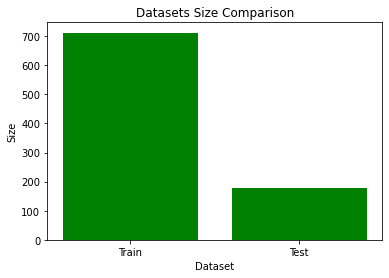

In [25]:
result

In [26]:
from deepchecks import ConditionResult

# Our parameters for the condition
low_threshold = 0.4
high_threshold = 0.6

# Create the condition function
def custom_condition(value: dict, low=low_threshold, high=high_threshold):
    ratio = value['Test'] / value['Train']
    if low <= ratio <= high:
        return ConditionResult(True)
    else:
        # Note: if you doesn't care about the extra info, you can return directly a boolean
        return ConditionResult(False, f'Test-Train ratio is {ratio:.2}')

# Create the condition name
condition_name = f'CustomX Test-Train ratio is between {low_threshold} to {high_threshold}'

# Create check instance with the condition
custom_check = DatasetSizeComparison().add_condition(condition_name, custom_condition)

In [27]:
result = DatasetSizeComparison().run(ds_train, ds_test)

,Train,Test
Size,712,179


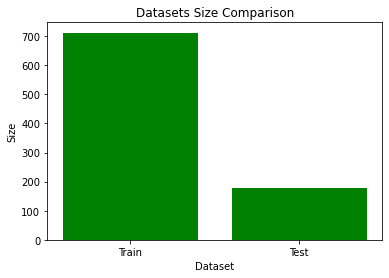

In [28]:
result

In [30]:
from deepchecks import Suite

In [31]:
new_custom_suite = Suite('Custom Suite for Condition check', custom_check)

In [32]:
new_custom_suite

Custom Suite for Condition check: [
	0: DatasetSizeComparison
		Conditions:
			0: CustomX Test-Train ratio is between 0.4 to 0.6
]

In [33]:
from deepchecks import ConditionResult, ConditionCategory

# Our parameters for the condition
low_threshold = 0.3
high_threshold = 0.7

# Create the condition function for check `DatasetsSizeComparison`
def custom_condition(value: dict):
    ratio = value['Test'] / value['Train']
    if low_threshold <= ratio <= high_threshold:
        return ConditionResult(True)
    elif ratio < low_threshold:
        return ConditionResult(False, f'Test-Train ratio is {ratio:.2}', ConditionCategory.FAIL)
    else:
        return ConditionResult(False, f'Test-Train ratio is {ratio:.2}', ConditionCategory.WARN)

In [78]:
new_custom_suite.run(ds_train, ds_test)

Custom Suite for Condition check:   0%|          | 0/1 [00:00<?, ? Check/s]